In [1]:
import pandas as pd

# Import dataset from local directory
hdb_resale = pd.read_csv("/Programming/Jupyter_Files/IT3385-MLOPS/Assignment/data/01_hdb_resale_transactions.csv")
hdb_resale.head()

block           street_name        town  postal_code    month flat_type  \
0   174   ANG MO KIO AVENUE 4  ANG MO KIO       560174  2015-01    3 ROOM   
1   541  ANG MO KIO AVENUE 10  ANG MO KIO       560541  2015-01    3 ROOM   
2   163   ANG MO KIO AVENUE 4  ANG MO KIO       560163  2015-01    3 ROOM   
3   446  ANG MO KIO AVENUE 10  ANG MO KIO       560446  2015-01    3 ROOM   
4   557  ANG MO KIO AVENUE 10  ANG MO KIO       560557  2015-01    3 ROOM   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     07 TO 09            60.0        Improved                 1986   
1     01 TO 03            68.0  New Generation                 1981   
2     01 TO 03            69.0  New Generation                 1980   
3     01 TO 03            68.0  New Generation                 1979   
4     07 TO 09            68.0  New Generation                 1980   

   resale_price  latitude   longitude      cbd_dist  min_dist_mrt  
0      255000.0  1.375097  103.837619  10296.855750   1096.947897  
1      275000.0  1.373922  103.855621  10065.227930    847.235690  
2      285000.0  1.373552  103.838169  10118.831550   1176.742184  
3      290000.0  1.367761  103.855357   9383.300907    682.205473  
4      290000.0  1.371626  103.857736   9825.917255    953.047695

## Data Exploratory

To better understand the dataset gotten, I've ulities a library called pandas-profiling that allows me to have generate a basic profile on my data such as correlation matrices , number and percentage of nulls and duplicates in the dataset. The

In [2]:
hdb_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194240 entries, 0 to 194239
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                194240 non-null  object 
 1   street_name          194240 non-null  object 
 2   town                 194240 non-null  object 
 3   postal_code          194240 non-null  int64  
 4   month                194240 non-null  object 
 5   flat_type            194240 non-null  object 
 6   storey_range         194240 non-null  object 
 7   floor_area_sqm       194240 non-null  float64
 8   flat_model           194240 non-null  object 
 9   lease_commence_date  194240 non-null  int64  
 10  resale_price         194240 non-null  float64
 11  latitude             194240 non-null  float64
 12  longitude            194240 non-null  float64
 13  cbd_dist             194240 non-null  float64
 14  min_dist_mrt         194240 non-null  float64
dtypes: float64(6), in

In [3]:
# install data profiling library
# !pip install ydata-profiling

In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(hdb_resale, title="HDB Resale Profiling Report")

C:\Users\Shi Min\anaconda3\envs\mlops\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Shi Min\anaconda3\envs\mlops\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The above pandas profile shows the count for each vairable in the dataset, number and percentage of duplicates, number of nulls, a heatmap that shows the correlation between all variables and what are the duplicated rows. However, this does not show how resale price are priced at due to different factors. Therefore, below will show some comparision between the variables in the dataset.

In [6]:
# From the above, there are about 0.2% of the data are duplicated which indicates the needs for removal.
hdb_resale.drop_duplicates(inplace=True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def plot_bar(x, y, df, title):
    df.sort_values(by=[y],inplace=True)
    plt.figure(figsize=(15, 5))
    sns.barplot(df, x=x, y=y).set(title=title)

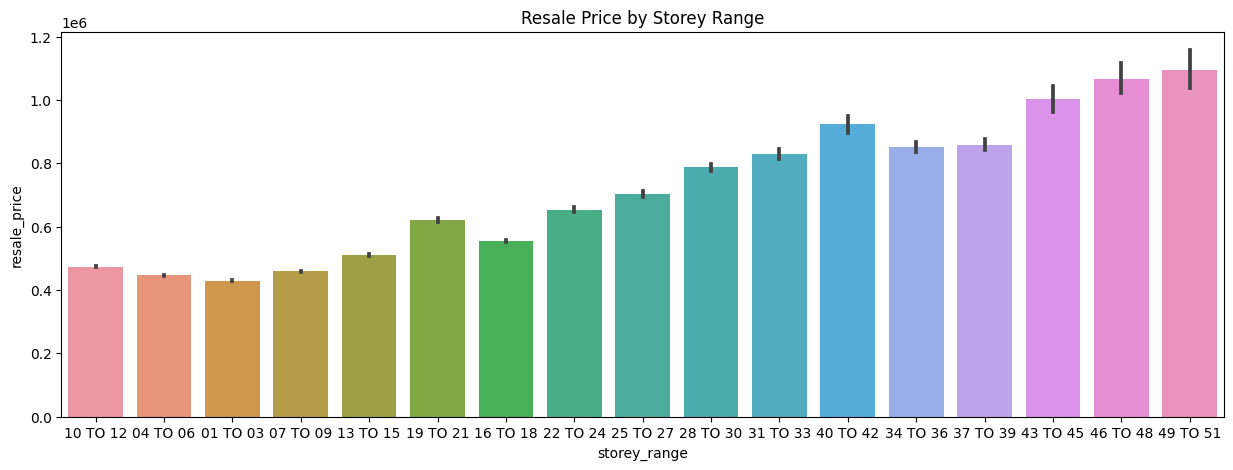

In [9]:
%matplotlib inline
plot_bar(x='storey_range', y='resale_price', df=hdb_resale, title="Resale Price by Storey Range")

To understand if cbd distance and minimum distance to mrt are related, a scatterplot was created. From the scatterplot, it shows that there's a positive correlation between the two variable.

<Axes: xlabel='cbd_dist', ylabel='min_dist_mrt'>

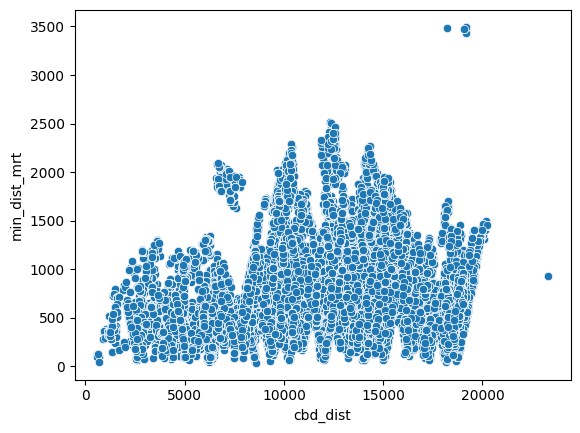

In [10]:
%matplotlib inline
sns.scatterplot(hdb_resale, x='cbd_dist', y='min_dist_mrt')

To better understand what flat type has higher chance of generating a higher resale price, I've created a bar chart. The below bar chart shows that as the flat type improves from 1ROOM to 2ROOm to 3ROOM etc, the resale price increases, which indicates that flat type affects resale price.

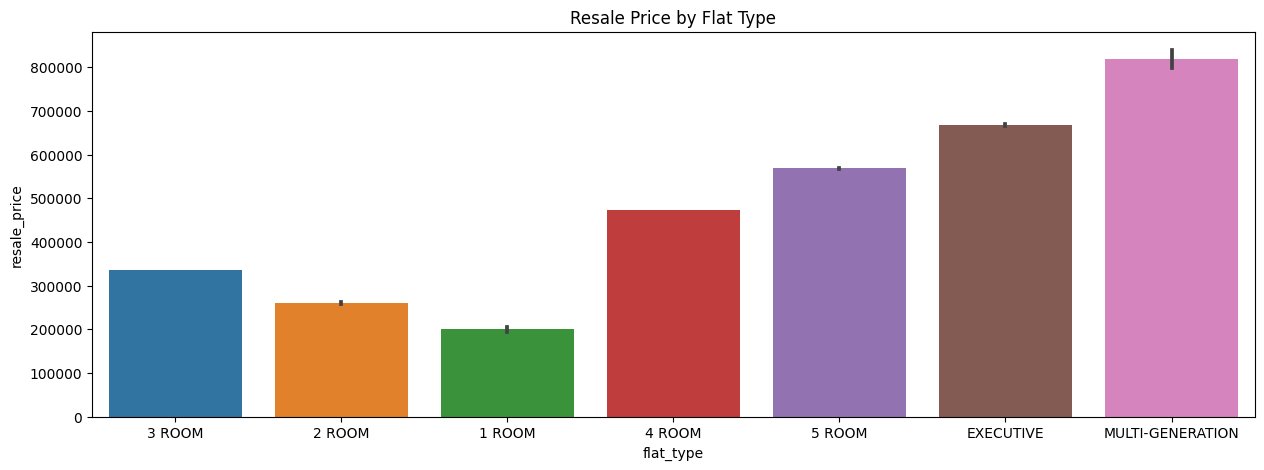

In [11]:
%matplotlib inline
plot_bar(x='flat_type', y='resale_price', df=hdb_resale, title="Resale Price by Flat Type")

However, in our dataset there is another variable called floor_area_sqm which can relate to flat type as well. With that when plotted, we can also see that as flat type improves, the floor_area_sqm increases. This results in high chance of correlation between flat_type and floor_area_sqm.

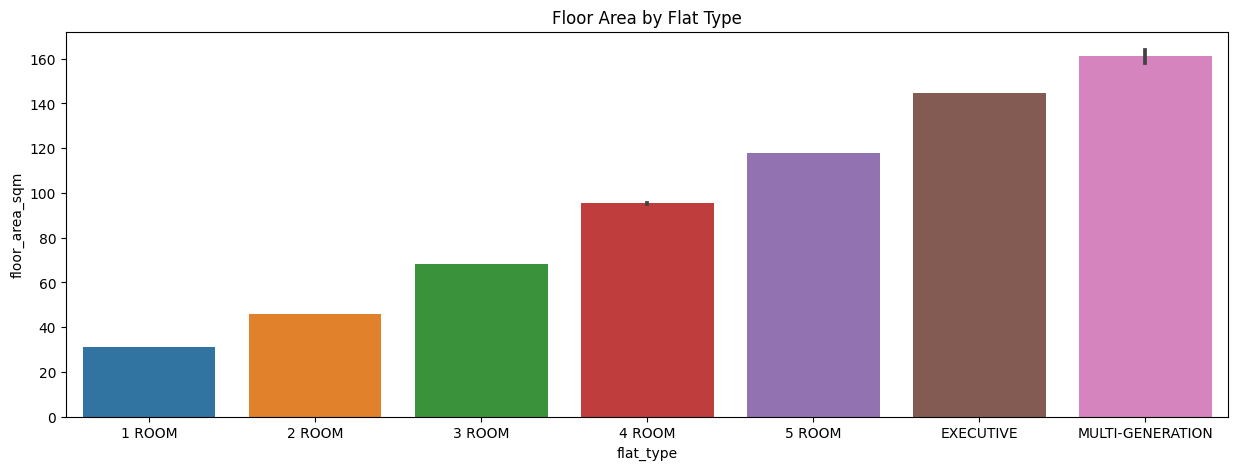

In [12]:
%matplotlib inline
plot_bar(x='flat_type', y='floor_area_sqm',df=hdb_resale, title="Floor Area by Flat Type")

Below shows the correlation between **numeric** variables in the dataset. It shows which variables are highly correlated and can cause high collinearity which can affect model performance. 

C:\Users\Shi Min\AppData\Local\Temp\ipykernel_25164\1204426434.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hdb_resale.corr()


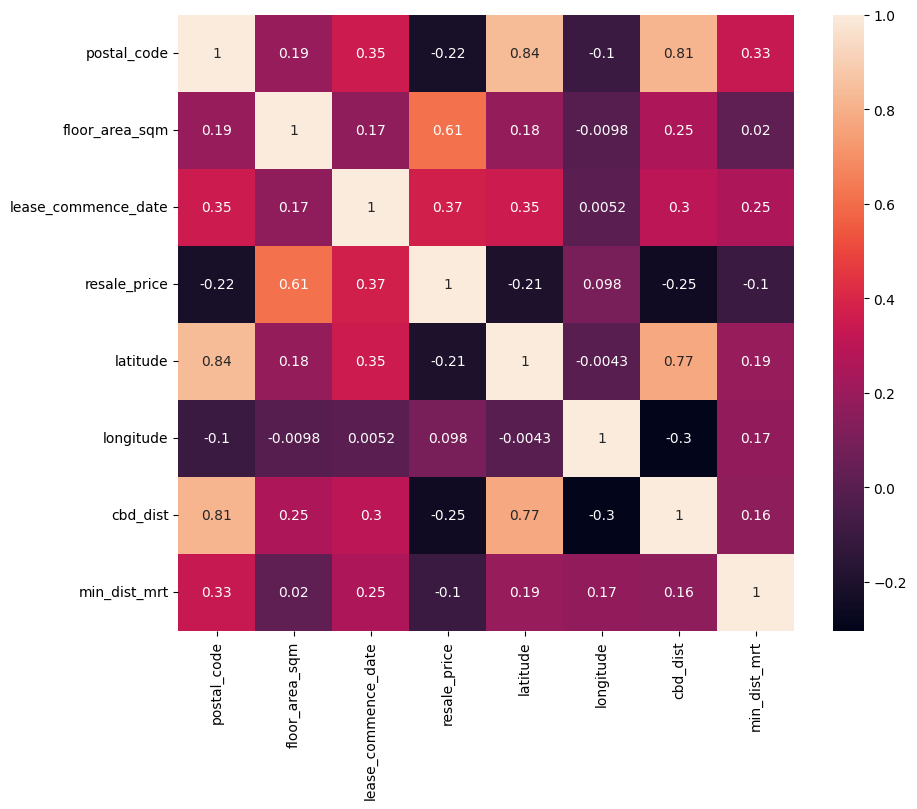

In [13]:
%matplotlib inline

corr = hdb_resale.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, square=True, annot = True)
plt.show()

From the above correlation matrix, the features that can be removed is postal code as it has a high correlation with cbd_dist and longitude. In addition, longitude and latitude can be removed as it is usally used for geographic mapping and not many individual will consider these variable when doing a prediction.

It also shows that our target variable will be affected by lease_commence_date and floor_area_sqm.

## Pycaret Model Pipeline Process
The pycaret setup is set that 

1. it uses resale_price  as the target variable
2. it logs the model creation and pipeline to mlflow using the name "hdb_resale"
3. it normalizes the data 
4. it scales the target variable to be in a normal distribution
5. Ignore feature that should not be included in the model creation

In [14]:
# sample data out for prediction later
hdb_data = hdb_resale.sample(frac=0.9, random_state=42)
hdb_unseen = hdb_resale.drop(hdb_data.index).reset_index(drop=True)

print("Data for Modeling:", hdb_data.shape)
print("Data for Prediction:", hdb_unseen.shape)

Data for Modeling: (174489, 15)
Data for Prediction: (19388, 15)


In [15]:
# initalise pycaret model pipeline
from pycaret.regression import *

hdb_exp = setup(data = hdb_data, target = 'resale_price', session_id=123, log_experiment = True, 
                experiment_name = 'hdb_resale', normalize = True, transform_target = True,
                ignore_features = ['longitude', 'latitude', 'flat_type'])

2023/08/18 10:47:43 INFO mlflow.tracking.fluent: Experiment with name 'hdb_resale' does not exist. Creating a new experiment.


In [16]:
# understand the datatype
hdb_exp.data.dtypes

block                  category
street_name            category
town                   category
postal_code               int32
month                  category
flat_type              category
storey_range           category
floor_area_sqm          float32
flat_model             category
lease_commence_date       int32
latitude                float32
longitude               float32
cbd_dist                float32
min_dist_mrt            float32
resale_price            float32
dtype: object

In [17]:
# see transformed data
hdb_exp.get_config('dataset_transformed')

block  street_name      town  postal_code     month  \
27652  -0.522780    -1.321871 -1.367197     1.054763 -0.622944   
33803   0.628318     0.003291  0.671220    -0.201726 -0.832695   
100838 -0.404070    -1.160497 -0.866959     0.425655 -0.914915   
35253   0.499704     0.244473 -0.206803     0.584004 -0.482728   
21314   0.733030    -0.043340  0.772519     1.369288 -0.587336   
...          ...          ...       ...          ...       ...   
116353 -0.367037    -0.600581  0.671220    -0.205133 -0.293531   
77841   1.795647     2.151989  1.584400    -2.059672 -0.908496   
131195  0.661529     0.352986  0.405013     1.234064  0.391886   
14734  -0.153804    -0.499172 -0.866959     0.427151 -0.769426   
70811   0.872208    -0.388715 -0.861745    -0.468368 -0.829562   

        storey_range_01 TO 03  storey_range_04 TO 06  storey_range_19 TO 21  \
27652                2.146083              -0.549799              -0.134994   
33803               -0.465965               1.818848              -0.134994   
100838              -0.465965               1.818848              -0.134994   
35253               -0.465965              -0.549799               7.407743   
21314               -0.465965              -0.549799              -0.134994   
...                       ...                    ...                    ...   
116353              -0.465965               1.818848              -0.134994   
77841               -0.465965              -0.549799              -0.134994   
131195              -0.465965              -0.549799              -0.134994   
14734                2.146083              -0.549799              -0.134994   
70811                2.146083              -0.549799              -0.134994   

        storey_range_16 TO 18  storey_range_07 TO 09  ...  flat_model_Terrace  \
27652               -0.212349              -0.520693  ...           -0.024787   
33803               -0.212349              -0.520693  ...           -0.024787   
100838              -0.212349              -0.520693  ...           -0.024787   
35253               -0.212349              -0.520693  ...           -0.024787   
21314                4.709230              -0.520693  ...           -0.024787   
...                       ...                    ...  ...                 ...   
116353              -0.212349              -0.520693  ...           -0.024787   
77841                4.709230              -0.520693  ...           -0.024787   
131195              -0.212349               1.920519  ...           -0.024787   
14734               -0.212349              -0.520693  ...           -0.024787   
70811               -0.212349              -0.520693  ...           -0.024787   

        flat_model_2-room  flat_model_Type S2  flat_model_Multi Generation  \
27652           -0.018766           -0.032642                    -0.020638   
33803           -0.018766           -0.032642                    -0.020638   
100838          -0.018766           -0.032642                    -0.020638   
35253           -0.018766           -0.032642                    -0.020638   
21314           -0.018766           -0.032642                    -0.020638   
...                   ...                 ...                          ...   
116353          -0.018766           -0.032642                    -0.020638   
77841           -0.018766           -0.032642                    -0.020638   
131195          -0.018766           -0.032642                    -0.020638   
14734           -0.018766           -0.032642                    -0.020638   
70811           -0.018766           -0.032642                    -0.020638   

        flat_model_3Gen  flat_model_Premium Maisonette  lease_commence_date  \
27652         -0.008093                       -0.00949            -0.726774   
33803         -0.008093                       -0.00949            -0.801107   
100838        -0.008093                       -0.00949            -0.801107   
35253         -0.008093                    

In [18]:
# compare across all 25 models available in pycaret regression module
# remove models that will take more than 15 seconds so as to not lag my own laptop when tunning
best = compare_models(exclude=['rf','et'])

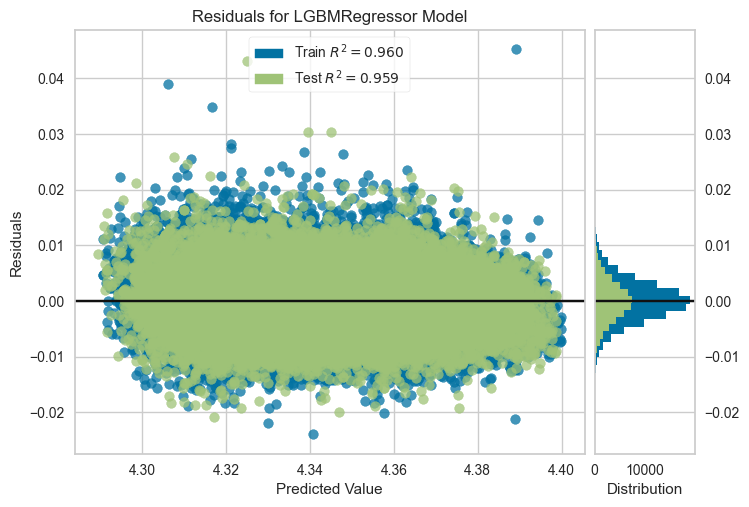

In [19]:
plot_model(best, plot = 'residuals')

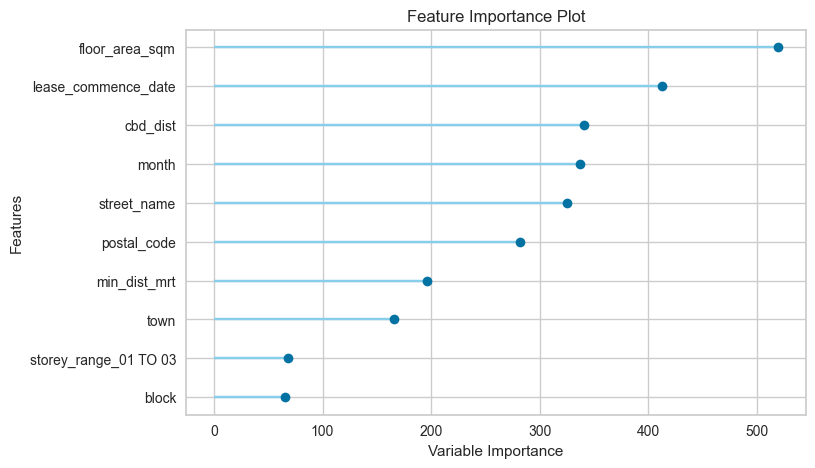

In [20]:
plot_model(best, plot = 'feature')

In [21]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
tuned_best = tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


From the above output, we can see that original light gradient boosting algorithm has a higher R-square value, lower mean squared error and mean absoulte error as compared to the tunned cross validation result. With that, the original model will be used for prediction.

In [24]:
print(best)

LGBMRegressor(n_jobs=-1, random_state=123)


In [25]:
final_best = finalize_model(best)
print(final_best)

Pipeline(memory=FastMemory(location=C:\Users\SHIMIN~1\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                             'lease_commence_date', 'cbd_dist',
                                             'min_dist_mrt']...
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['block', 'street_name', 'town',
                                             'month'],
                                    transformer=TargetEncoder(cols=['block',
                                                                    's

#### Testing on unseen data

In [26]:
# display any scientific values
pd.set_option('display.float_format', lambda x: '%.3f' % x)

predictions = predict_model(final_best, data = hdb_unseen)

In [27]:
predictions.head()

block             street_name         town  postal_code    month flat_type  \
0     7  TELOK BLANGAH CRESCENT  BUKIT MERAH        90007  2017-07    1 ROOM   
1     7  TELOK BLANGAH CRESCENT  BUKIT MERAH        90007  2022-07    1 ROOM   
2     7  TELOK BLANGAH CRESCENT  BUKIT MERAH        90007  2015-02    1 ROOM   
3     7  TELOK BLANGAH CRESCENT  BUKIT MERAH        90007  2018-06    1 ROOM   
4     7  TELOK BLANGAH CRESCENT  BUKIT MERAH        90007  2022-06    1 ROOM   

  storey_range  floor_area_sqm flat_model  lease_commence_date  latitude  \
0     10 TO 12          31.000   Improved                 1975     1.278   
1     01 TO 03          31.000   Improved                 1975     1.278   
2     01 TO 03          31.000   Improved                 1975     1.278   
3     10 TO 12          31.000   Improved                 1975     1.278   
4     01 TO 03          31.000   Improved                 1975     1.278   

   longitude  cbd_dist  min_dist_mrt  resale_price  prediction_label  
0    103.819  3588.832      1239.979         4.250        203159.150  
1    103.819  3588.832      1239.979         4.258        244245.291  
2    103.819  3588.832      1239.979         4.255        200396.333  
3    103.819  3588.832      1239.979         4.241        203159.150  
4    103.819  3588.832      1239.979         4.263        244245.291

In [29]:
save_model(final_best, '/Programming/School_Related/Machine_Learning_Operations/models/hdb_lightgbm_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\SHIMIN~1\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                              'lease_commence_date', 'cbd_dist',
                                              'min_dist_mrt']...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['block', 'street_name', 'town',
                                              'month'],
                                     transformer=TargetEncoder(cols=['block',
                                                         

In [30]:
import mlflow

In [31]:
!mlflow ui

^C
